0


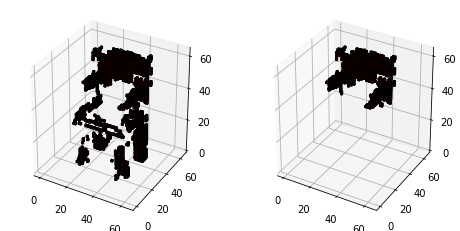

tensor(1988.9000)


In [22]:
import binvox_rw
import torch
import matplotlib.pyplot as plt
import numpy as np
from utils import generate_z
from generate import SuperGenerator
from mpl_toolkits.mplot3d import axes3d, Axes3D
import copy

G=SuperGenerator()
with open ('chair1.binvox','rb')    as f:
    model =binvox_rw.read_as_3d_array(f)
    
z0=generate_z()
z1=copy.deepcopy(z0)
ax=13
bx=55
ay=20
by=60
az=35
bz=63
def diff_evaluator(dim,z0,z1,G,ax,bx,ay,by,az,bz):
    z0[dim]=-0.5
    z1[dim]=0.5
    z0[193]=-0.2
    z1[193]=0.2
    voxels0 = G.generate(z0, 'Chair')
    voxels1 = G.generate(z1,'Chair')
    diff=(voxels0-voxels1)
    diff_abs=diff.abs()
    diff_abs[diff_abs<0.3]=0
    
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    mask=torch.zeros(64,64,64,device=DEVICE,dtype=torch.float)
    mask=mask-1
    mask[ax:bx,az:bz,ay:by]=3
    diff_abs=diff_abs*mask
    
    nonzero_diff = torch.nonzero(diff_abs >= 0.01).tolist()
    coords_arr_diff = [[[False for k in range(64)] for j in range(64)] for i in range(64)]
    for i in range(len(nonzero_diff)):
        coords_arr_diff[nonzero_diff[i][0]][nonzero_diff[i][2]][nonzero_diff[i][1]]=True
    
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax2 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2.voxels(np.array(torch.transpose(diff_abs,1,2).cpu()), facecolors=colors, edgecolor='k')

    ax3 = fig.add_subplot(1, 2, 2, projection='3d')
    ax3.voxels(np.array(coords_arr_diff), facecolors=colors, edgecolor='k')
    plt.show()
    
    return diff_abs.sum()
print(diff_evaluator(95,z0,z1,G,ax,bx,ay,by,az,bz).cpu())
#for i in range(200):
    #print(i,diff_evaluator(i,copy.deepcopy(z0),copy.deepcopy(z0),G,ax,bx,ay,by,az,bz).cpu())


/opt/conda/conda-bld/pytorch_1591914855613/work/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


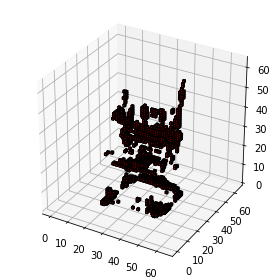

In [2]:


def diffGenerator(dim,value0,value1,z0,z1,G):
    z0[dim]=value0
    z1[dim]=value1
    voxels0 = G.generate(z0, 'Chair')
    voxels1 = G.generate(z1,'Chair')
    diff=voxels0-voxels1
    nonzero_diff = torch.nonzero(diff >= 0.3).tolist()
    coords_arr_diff = [[[False for k in range(64)] for j in range(64)] for i in range(64)]
    for i in range(len(nonzero_diff)):
        coords_arr_diff[nonzero_diff[i][0]][nonzero_diff[i][2]][nonzero_diff[i][1]]=True
    return coords_arr_diff

 

colors='red'

fig = plt.figure(figsize=plt.figaspect(1))#plt.figure(figsize=(8,4))とおなじ
dim=11
#  First subplot
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.voxels(np.array(diffGenerator(dim,-0.5,0.5,z0,z1,G)), facecolors=colors, edgecolor='k')

# Second subplot
#ax2 = fig.add_subplot(1, 3, 2, projection='3d')
#ax2.voxels(np.array(diffGenerator(dim,0,0.5,z0,z1,G)), facecolors=colors, edgecolor='k')

#ax3 = fig.add_subplot(1, 3, 3, projection='3d')
#ax3.voxels(np.array(diffGenerator(dim,0.5,1.0,z0,z1,G)), facecolors=colors, edgecolor='k')



plt.tight_layout()
#plt.savefig('3dsubplots.jpg',dpi=100)
plt.show()


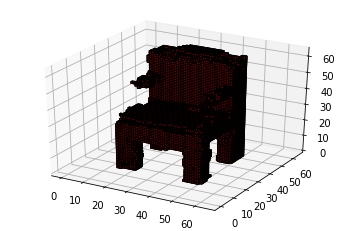

In [29]:
voxels0=G.generate(z0,'Chair')
nonzero_voxels0 = voxels0>0.5
tr_vx=torch.transpose(nonzero_voxels0,1,2)
#nonzero_voxels1 = torch.nonzero(voxels1 >= 0.5).tolist()
#coords_arr_voxels0 = [[[False for k in range(64)] for j in range(64)] for i in range(64)]
#coords_arr_voxels1 = [[[False for k in range(64)] for j in range(64)] for i in range(64)]
#for i in range(len(nonzero_voxels0)):
#    coords_arr_voxels0[nonzero_voxels0[i][0]][nonzero_voxels0[i][2]][nonzero_voxels0[i][1]]=True
#for i in range(len(nonzero_voxels1)):
#    coords_arr_voxels1[nonzero_voxels1[i][2]][nonzero_voxels1[i][1]][nonzero_voxels1[i][0]]=True

colors='red'
fig = plt.figure()
ax3 = fig.gca(projection='3d')
ax3.voxels(tr_vx.to('cpu').detach().numpy().copy(), facecolors=colors, edgecolor='k')
plt.show()

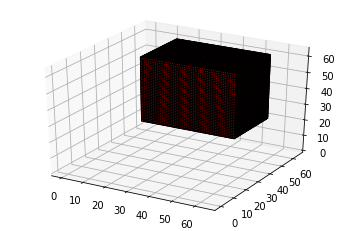

In [4]:
def visualize_area(ax,bx,ay,by,az,bz):
    coords = [[[False for k in range(64)] for j in range(64)] for i in range(64)]
    for x in range(ax,bx):
        for y in range(ay,by):
            for z in range(az,bz):
                coords[x][z][y]=True
    return coords



colors='red'
# and plot everything
fig = plt.figure()
ax3 = fig.gca(projection='3d')
ax3.voxels(np.array(visualize_area(ax,bx,ay,by,az,bz)), facecolors=colors, edgecolor='k')
plt.show()